In [ ]:
import numpy as np

In [2]:
class Ridge:

    def __init__(self, learning_rate=0.01, epoch=1000, tol=1e-4, batch_size=64, seed=42, l2_regularization=0, verbose=False) -> None:

        np.random.seed(seed)
        
        self.verbose = verbose
        self.lr = learning_rate
        self.tol = tol
        self.epoch = epoch
        self.batch_size = batch_size
        self.l2 = l2_regularization
        self.loss = np.zeros(shape = (self.epoch, ))
    

    def predict(self, X):
        
        m, _ = X.shape
        X = np.hstack((np.ones((m, 1)), X))

        return np.dot(X, self.coefs_)
    

    def batch_generator(self, X, y, batch_size):

        m, _ = X.shape
        indices = np.arange(m)
        np.random.shuffle(indices)

        for start in np.arange(0, m, batch_size):

            end = min(start + batch_size, m)
            yield X[start : end], y[start : end]
    

    def fit(self, X, y):

        m, n = X.shape
        x = X.copy()
        X = np.hstack((np.ones((m, 1)), X))

        if y.ndim == 1:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (n + 1, ))
        
        else:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (n + 1, 1))
        

        for e in np.arange(self.epoch):

            pred = self.predict(x)
            loss = np.mean(np.square(y - pred)) + self.l2 * np.sum(np.square(self.coefs_[1:]))
            self.loss[e] = loss

            self.coefs_ -= self.lr * (-2 / m) * np.dot(X.T, y - pred)  + 2 * self.l2 * np.hstack(([0], self.coefs_[1:]))

            if self.verbose:
                print(f"epoch {e}/{self.epoch} -- loss {self.loss[e]:.2f}")

            if e >= 1 and np.abs(self.loss[e] - self.loss[e - 1]) < self.tol:

                break

epoch 0/1000 -- loss 45.22
epoch 10/1000 -- loss 20.17
epoch 20/1000 -- loss 9.37
epoch 30/1000 -- loss 4.71
epoch 40/1000 -- loss 2.69
epoch 50/1000 -- loss 1.81
epoch 60/1000 -- loss 1.42
epoch 70/1000 -- loss 1.24
epoch 80/1000 -- loss 1.15
epoch 90/1000 -- loss 1.10
epoch 100/1000 -- loss 1.07
epoch 110/1000 -- loss 1.05
epoch 120/1000 -- loss 1.03
epoch 130/1000 -- loss 1.01
epoch 140/1000 -- loss 1.00
epoch 150/1000 -- loss 0.99
epoch 160/1000 -- loss 0.98
epoch 170/1000 -- loss 0.96
epoch 180/1000 -- loss 0.95
epoch 190/1000 -- loss 0.94
epoch 200/1000 -- loss 0.94
epoch 210/1000 -- loss 0.93
epoch 220/1000 -- loss 0.92
epoch 230/1000 -- loss 0.91
epoch 240/1000 -- loss 0.90
epoch 250/1000 -- loss 0.90
epoch 260/1000 -- loss 0.89
epoch 270/1000 -- loss 0.89
epoch 280/1000 -- loss 0.88
epoch 290/1000 -- loss 0.88
epoch 300/1000 -- loss 0.87
epoch 310/1000 -- loss 0.87
epoch 320/1000 -- loss 0.86
epoch 330/1000 -- loss 0.86
epoch 340/1000 -- loss 0.86
epoch 350/1000 -- loss 0.85
e

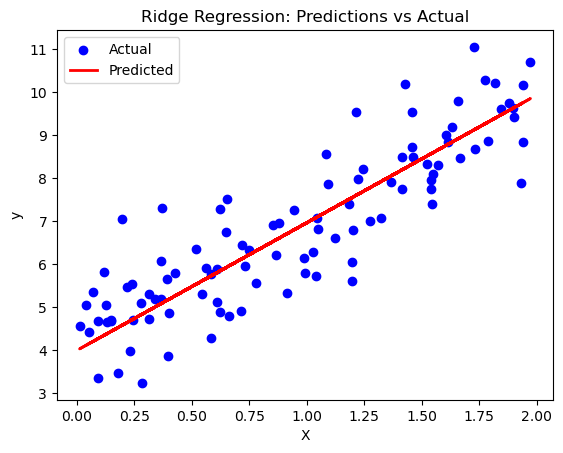

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset for testing
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Instantiate the Ridge regression class
ridge_model = Ridge(lr=0.01, epoch=1000, l2=0)

# Fit the model on the entire dataset
ridge_model.fit(X, y)

# Predict on the same dataset (using the same X for prediction)
y_pred = ridge_model.predict(X)  # Adding bias term

# Print out the final training loss
print(f"Final training loss: {ridge_model.loss[-1]:.4f}")

# Plot predictions vs actual
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression: Predictions vs Actual")
plt.legend()
plt.show()
